# Introduction to Machine Learning
## Lecture 3 - Classification
### Notebook 1: Simple Bayes' Classifier
Prapared by: Said Bolluk

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

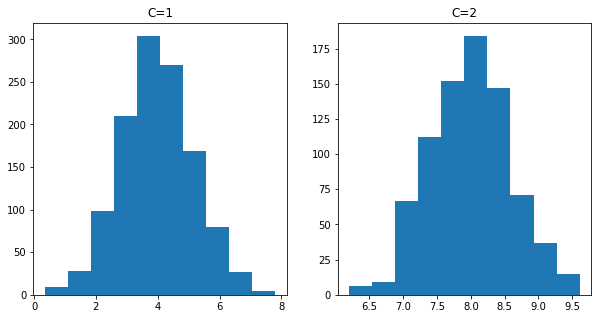

In [2]:
# Set the random seed to generate reproducible results
np.random.seed(0)

# Determine the parameters of the distribution for each classes
mu1, sigma1 = 4, 1.2
mu2, sigma2 = 8, 0.6

# The dataset consists of 2000 instances.
# 1200 of them belong to class one (1) while 800 of them class two (2).


# Create the input sets
X1 = np.random.normal(mu1, sigma1, (1200,))
X2 = np.random.normal(mu2, sigma2, (800,))

# Create the target (labels) sets
y1 = np.ones((1200,))
y2 = np.full((800, ), 2)

# Join arrays and create the whole sets
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

# Plot the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(X1, bins=10)
ax1.set_title("C=1")
ax2.hist(X2, bins=10)
ax2.set_title("C=2")
plt.show()

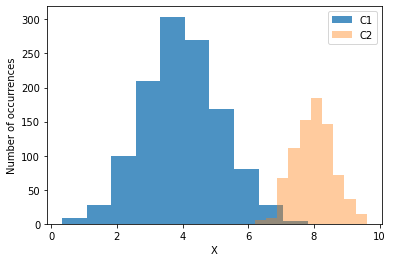

In [3]:
plt.hist(X1, bins=10, alpha=0.8, label="C1")
plt.hist(X2, bins=10, alpha=0.4, label="C2")
plt.xlabel("X")
plt.ylabel("Number of occurrences")
plt.legend()
plt.show()

In [4]:
# Determien the x_t and r_t values for each class
X1 = X[y==1]
X2 = X[y==2]

r1 = y[y==1]
r2 = y[y==2]

In [5]:
# Estimate the parameters of the distributions for two classes
# X ~ N(mean, std.)
# Number of parameters to be estimated: 3
# (1) Mean, (2) Std., (3) Prior Probabilities

# Class One
mean_one = np.sum(X1*r1) / np.sum(r1)
var_one = np.sum(np.square(X1-mean_one) * r1) / np.sum(r1)
std_one = np.sqrt(var_one)
prior_one = r1.shape[0] / y.shape[0]

# Class Two
mean_two = np.sum(X2*r2) / np.sum(r2)
var_two = np.sum(np.square(X2-mean_two) * r2) / np.sum(r2)
std_two = np.sqrt(var_two)
prior_two = r2.shape[0] / y.shape[0]

In [6]:
# Create a data frame to compare the parameters of the distributions
dictionary = {
    "Class": ["One", "Two"],
    "Estimated Mean": [mean_one, mean_two],
    "Estimated Std.": [std_one, std_two],
    "Expected Mean": [mu1, mu2],
    "Expected Std.": [sigma1, sigma2],
    "Prior Probability": [prior_one, prior_two],
}

frame = pd.DataFrame(dictionary).round(3)
frame

,Class,Estimated Mean,Estimated Std.,Expected Mean,Expected Std.,Prior Probability
0,One,3.974,1.174,4,1.2,0.6
1,Two,7.996,0.587,8,0.6,0.4


**Note:** We expect the estimated parameters to be similar to the population's, which we derived from the Gaussian Distribution. As you can see from the table above, the difference is minimal. When the number of observations increases in the sample space, the difference gets smaller since the sample space gets closer to the population.

In [7]:
# Re-order the sample space increasingly
minimum = np.min(X)
maximum = np.max(X)
n_observations = X.shape[0]

sample_space = np.linspace(minimum, maximum, n_observations)

In [8]:
def posterior(sample):
    # Sample should be an array since we will iterate over it
    
    # Create empty arrays for the likelihoods: p(x|C)
    likelihood1 = np.array([])
    likelihood2 = np.array([])
    
    # Create empty arrays for the hypothesis (estimator): h(x) = p(x|C) * P(C)
    estimator1 = np.array([])
    estimator2 = np.array([])
    
    # Create an empty array for the evidence: P(x) = sum[ P(x|C_i)*P(C_i)]
    evidence_array = np.array([])
    
    pi = np.pi
    
    for x_t in sample:
        
        # Class One (1)
        pdf_one = 1/(std_one*np.sqrt(2*pi)) * np.exp( -(x_t-mean_one)**2 / ( 2 * std_one**2) )
        likelihood1 = np.append(likelihood1, pdf_one)
        log_likelihood_one = -(1/2)*np.log(2*pi) - np.log(std_one) - ( (x_t-mean_one)**2 / (2*std_one**2) )
        # log h(x) = log p(x|C) + log P(C)
        estimation_one = log_likelihood_one + np.log(prior_one)
        estimator1 = np.append(estimator1, estimation_one)        
        
        # Class Two (2)
        pdf_two = 1/(std_two*np.sqrt(2*pi)) * np.exp( -(x_t-mean_two)**2 / ( 2 * std_two**2) )
        likelihood2 = np.append(likelihood2, pdf_two)
        log_likelihood_two = -(1/2)*np.log(2*pi) - np.log(std_two) - ( (x_t-mean_two)**2 / (2*std_two**2) )
        # log h(x) = log p(x|C) + log P(C)
        estimation_two = log_likelihood_two + np.log(prior_two)
        estimator2 = np.append(estimator2, estimation_two)
        
        # Evidence: P(x) = sum[P(x|C_i)*P(C_i)]
        evidence = (estimation_one + estimation_two)
        evidence_array = np.append(evidence_array, evidence)
        
    #evidence = estimator1 + estimator2
    # Calculate the posterior probabilities
    posterior1 = estimator1 / evidence_array 
    posterior2 = estimator2 / evidence_array
    
    # Return the likelihoods & posteriors
    return likelihood1, likelihood2, posterior1, posterior2

Run the function to obtain results

In [15]:
likelihood1, likelihood2, posterior2, posterior1 = posterior(sample=sample_space)

Calculate accuracy score of the classification

In [16]:
# Choose the class with the highest posterior probability: C_i = max(P(C_i|x))
# In binary case, choose the class with higher than 50% probability: C_i if P(C_i)>0.5
predictions = np.array([])

for p in posterior1:
    if p > 0.5:
        pred_label = 1
    else:
        pred_label = 2
        
    predictions = np.append(predictions, pred_label)

In [17]:
# Calculate the accuracy score
true_predicted = np.sum(predictions==y)
accuracy = true_predicted / y.shape[0]
print(f"Accuracy Score of the Bayes' Classifier: {accuracy:.3f}")

Accuracy Score of the Bayes' Classifier: 0.924


Examine the relationship between the likelihoods and posterior probabilitites

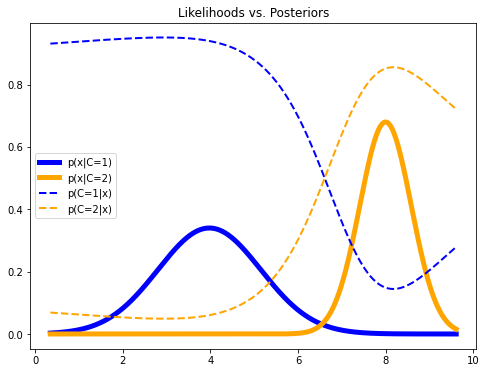

In [18]:
# Visualize the results
plt.figure(figsize=(8, 6))
# Plot Likelihoods: p(x|C)
plt.plot(sample_space, likelihood1, linewidth=5, color="blue", label="p(x|C=1)")
plt.plot(sample_space, likelihood2, linewidth=5, color="orange", label="p(x|C=2)")
# Plot Posteriors: p(C|x)
plt.plot(sample_space, posterior1, linewidth=2, linestyle="--", color="blue", label="p(C=1|x)")
plt.plot(sample_space, posterior2, linewidth=2, linestyle="--", color="orange", label="p(C=2|x)")
plt.title("Likelihoods vs. Posteriors")
plt.legend()
plt.show()

**Discussion**
\
The above graph shows that the likelihood densities determined the posterior probabilities. This suggests that the distribution of the class labels helped us make predictions. The estimator is very confident in the zones where the likelihood value is high, and on the contrary, it produces wrong decisions in the zone where two distribution intercepts (between 5-7). This is because, in the sample set, there were instances in that zone for both classes. For such zones, not making any decision might be better than making an unconfident decision considering the scope of the task. This concept is called **cost-sensitivity** in classification and will be discussed in the following sections.

# END